# blood_feature_selection_by_Shapley_values

#### This notebook:
* Load the EWAS aging data selecting for whole blood data
* Drop columns with more than 10% NaN
* Split data train/test 75/25
* Impute both train and test with mean of each train column.
* Run XGboost 50 time on training data with different train/validation splits (took 4hrs)
* computing. and storing Shapley scores
* Rank cpgs by frequency in top 100 mean absolute Shappley scores
* Save rankings as pickled file 'cpgs_XGboost_Shapley_blood_ranked'

#### Conclusion
* 8 of top 10 cpgs same ranked this way as oppose to importance scores
* 82 of top 100 
* 325 of top 1000

#### Imports

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
from sklearn.model_selection import train_test_split

#### Import our modules,
* age_predict is a python package we created for this project.
* to install it, in a terminal go to the age_predict folder and type: pip install .

In [2]:
import age_predict.Loading_EWAS_Aging_Data as le
import age_predict.Regression as rg
import age_predict.Pickle_unpickle as pu

In [3]:
import os
# View working directory
os.getcwd()
#os.chdir(')

'/Users/dcox/Desktop/EWAS-organized/Utilities'

#### Set paths

In [7]:
# Paths
path_to_data = '../../data/age_methylation_v1/'

#### Set tissue of interest

In [8]:
tissue_of_interest = 'whole blood'

#### Load data

In [9]:
%%time
# The data file is processed one row at a time and the rows corresponding to 
# the tissue of interest are saved. This involves writing to a new csv file just 
# data from the tissue of interest and then reading it back in. All of this is done 
# with the function "load_EWAS_aging_by_tissue()" which uses the csv module.
# Reading it directly with Pandas is far to slow.

file_in = path_to_data + 'age_methylation_v1.txt'
file_out = path_to_data + tissue_of_interest + '_age_methylation_v1.txt'

df_t = le.load_EWAS_aging_by_tissue(file_in, file_out, search_term=tissue_of_interest,
                          num_rows='all', verbose=True)

finished line 10000
finished line 20000
finished line 30000
finished line 40000
finished line 50000
finished line 60000
finished line 70000
finished line 80000
finished line 90000
finished line 100000
finished line 110000
finished line 120000
finished line 130000
finished line 140000
finished line 150000
finished line 160000
finished line 170000
finished line 180000
finished line 190000
finished line 200000
finished line 210000
finished line 220000
finished line 230000
finished line 240000
finished line 250000
finished line 260000
finished line 270000
finished line 280000
finished line 290000
finished line 300000
finished line 310000
finished line 320000
finished line 330000
finished line 340000
finished line 350000
finished line 360000
finished line 370000
finished line 380000
finished line 390000
finished line 400000
finished line 410000
finished line 420000
finished line 430000
finished line 440000
finished line 450000
finished line 460000
finished line 470000
finished line 480000



#### Select age 20 and older

In [10]:
df_t_over20 = df_t[df_t.age >=20]

#### Split and impute data
* Drop row with more than 10% NaN
* Impute with means of train columns
* Split 75/25

In [11]:
%%time
df_train, df_test = le.splitting_and_imputing(df_t_over20, input_percent=10, 
                                           fraction_test=0.25, seed=2021)

CPU times: user 3min 53s, sys: 48.2 s, total: 4min 42s
Wall time: 5min 5s


In [12]:
df_train

sample_id,tissue,age,cg02494853,cg03706273,cg04023335,cg05213048,cg15295597,cg26520468,cg27539833,cg00008945,...,ch.22.569473R,ch.22.38010425R,ch.22.707968R,ch.22.740407F,ch.22.757911F,ch.22.43177094F,ch.22.46830341F,ch.22.1008279F,ch.22.47579720R,ch.22.48274842R
GSM2334366,whole blood,94,0.078,0.205,0.139,0.904,0.120,0.970,0.912,0.276,...,0.109,0.016,0.003,0.006000,0.010000,0.004,0.010,0.001000,0.047,0.012
GSM989863,whole blood,101,0.013,0.008,0.117,0.756,0.033,0.958,0.933,0.324,...,0.152,0.015,0.005,0.008000,0.009000,0.002,0.009,0.001000,0.057,0.008
GSM1443696,whole blood,99,0.013,0.017,0.477,0.715,0.017,0.966,0.932,0.010,...,0.122,0.005,0.006,0.011000,0.027000,0.000,0.003,0.002000,0.033,0.003
GSM1069241,whole blood,99,0.013,0.017,0.477,0.715,0.017,0.966,0.932,0.010,...,0.122,0.005,0.006,0.011000,0.027000,0.000,0.003,0.002000,0.033,0.003
GSM1572442,whole blood,112,0.036,0.255,0.260,0.690,0.065,0.983,0.951,0.341,...,0.138,0.011,0.004,0.012000,0.037000,0.002,0.006,0.007000,0.036,0.150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1498536,whole blood,48,0.010,0.048,0.068,0.575,0.034,0.981,0.946,0.352,...,0.155,0.028,0.007,0.019000,0.018202,0.002,0.011,0.003000,0.052,0.016
GSM1868331,whole blood,48,0.024,0.019,0.635,0.848,0.035,0.958,0.944,0.005,...,0.127,0.009,0.004,0.001000,0.011000,0.004,0.005,0.000000,0.036,0.097
GSM2337452,whole blood,48,0.027,0.032,0.145,0.661,0.068,0.964,0.936,0.388,...,0.133,0.016,0.028,0.008000,0.017000,0.003,0.009,0.002000,0.054,0.107
GSM1653326,whole blood,48,0.033,0.023,0.529,0.772,0.064,0.956,0.946,0.000,...,0.089,0.001,0.009,0.008616,0.018202,0.000,0.003,0.002595,0.034,0.076


In [13]:
df_test

sample_id,tissue,age,cg02494853,cg03706273,cg04023335,cg05213048,cg15295597,cg26520468,cg27539833,cg00008945,...,ch.22.569473R,ch.22.38010425R,ch.22.707968R,ch.22.740407F,ch.22.757911F,ch.22.43177094F,ch.22.46830341F,ch.22.1008279F,ch.22.47579720R,ch.22.48274842R
GSM1345728,whole blood,38,0.020,0.037,0.100,0.529,0.025,0.975,0.924,0.400,...,0.12600,0.015,0.001,0.009,0.010,0.007,0.012,0.003,0.041,0.009
GSM1425726,whole blood,79,0.042,0.039,0.647,0.854,0.067,0.968,0.934,0.009,...,0.13377,0.008,0.002,0.007,0.007,0.002,0.006,0.000,0.023,0.006
GSM1886430,whole blood,24,0.022,0.021,0.501,0.676,0.032,0.966,0.939,0.001,...,0.20100,0.009,0.007,0.009,0.011,0.004,0.010,0.003,0.057,0.004
GSM2337042,whole blood,25,0.016,0.030,0.120,0.534,0.028,0.974,0.924,0.308,...,0.09600,0.026,0.002,0.008,0.016,0.004,0.020,0.002,0.065,0.008
GSM1886440,whole blood,23,0.013,0.011,0.607,0.862,0.090,0.957,0.871,0.000,...,0.18100,0.027,0.013,0.010,0.048,0.001,0.005,0.003,0.039,0.006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM990569,whole blood,85,0.030,0.031,0.692,0.841,0.031,0.954,0.916,0.008,...,0.13900,0.016,0.007,0.014,0.009,0.003,0.011,0.002,0.039,0.112
GSM1345649,whole blood,49,0.036,0.029,0.599,0.706,0.036,0.958,0.929,0.001,...,0.13000,0.014,0.004,0.004,0.010,0.002,0.005,0.001,0.034,0.003
GSM2334025,whole blood,26,0.032,0.034,0.169,0.577,0.047,0.989,0.935,0.415,...,0.16000,0.018,0.008,0.007,0.020,0.002,0.011,0.002,0.047,0.007
GSM989849,whole blood,93,0.059,0.051,0.670,0.775,0.066,0.961,0.932,0.014,...,0.13500,0.026,0.006,0.008,0.005,0.007,0.011,0.001,0.046,0.120


In [29]:
import os
# Get
os.getcwd()
# Change
os.chdir('/Users/dcox/Desktop/EWAS-organized/blood/feature_selection')

In [22]:
# repeat_XGBoost numtrials times using a different split each time 
# returns importance scores for each run in a df 
import xgboost
import shap
from xgboost import XGBRegressor


def repeat_XGBoost_shap(df_processed, numtrials, early_stopping_rounds = 10, start_column=2, test_size=0.20):
    X = df_processed.iloc[:, 2:]
    y = df_processed.age
    abs_shap_means = []
    models = []
    for i in range(numtrials): 
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
        
        XG = XGBRegressor(objective='reg:squarederror',
                    n_estimators=200,
                    min_child_weight=1,
                    max_depth=3,
                    subsample=0.7,
                    colsample_bytree=0.5,
                    learning_rate=0.1)
    
        eval_set = [(X_train, y_train),(X_test, y_test)]
        XG.fit(X_train, y_train, eval_metric="rmse", early_stopping_rounds = early_stopping_rounds, eval_set=eval_set, verbose=False)
        print('explainer')
        explainer = shap.Explainer(XG)
        print('shap_values')
        shap_values = explainer(X_test)
        print('abs_shap_values')
        abs_shap_values = np.abs(shap_values.values)
        print('abs_shap_mean')
        abs_shap_means.append(np.mean(abs_shap_values, axis=0))
        print('saving model')
        models.append(XG)
        print(i+1)
        
    df_shap = pd.DataFrame(abs_shap_means, columns = df_processed.columns[2:])
    df_shap = df_shap.transpose()
    cols = []
    for i in range(1,numtrials+1):
        cols.append('trial_'+str(i))
    df_shap.columns = cols
    df_shap['Mean'] = df_shap.mean(axis=1)
    df_shap['Std'] = df_shap.std(axis=1)
    return df_shap, models

#### Run XGboost 50 times to identify most importance cpgs by absolute mean Shapley score
The following hyperparameters were used (identified as ~ optimal by cv)
* n_estimators=200
* n_estimators=200,
* min_child_weight=1,
* max_depth=3,
* subsample=0.7,
* colsample_bytree=0.5,
* learning_rate=0.1)

In [23]:
%%time
df_shap_vals, models = repeat_XGBoost_shap(df_train, 50, early_stopping_rounds = 10, start_column=2, test_size=0.20)

explainer
shap_values
abs_shap_values
abs_shap_mean
saving model
1
explainer
shap_values
abs_shap_values
abs_shap_mean
saving model
2
explainer
shap_values
abs_shap_values
abs_shap_mean
saving model
3
explainer
shap_values
abs_shap_values
abs_shap_mean
saving model
4
explainer
shap_values
abs_shap_values
abs_shap_mean
saving model
5
explainer
shap_values
abs_shap_values
abs_shap_mean
saving model
6
explainer
shap_values
abs_shap_values
abs_shap_mean
saving model
7
explainer
shap_values
abs_shap_values
abs_shap_mean
saving model
8
explainer
shap_values
abs_shap_values
abs_shap_mean
saving model
9
explainer
shap_values
abs_shap_values
abs_shap_mean
saving model
10
explainer
shap_values
abs_shap_values
abs_shap_mean
saving model
11
explainer
shap_values
abs_shap_values
abs_shap_mean
saving model
12
explainer
shap_values
abs_shap_values
abs_shap_mean
saving model
13
explainer
shap_values
abs_shap_values
abs_shap_mean
saving model
14
explainer
shap_values
abs_shap_values
abs_shap_mean
savin

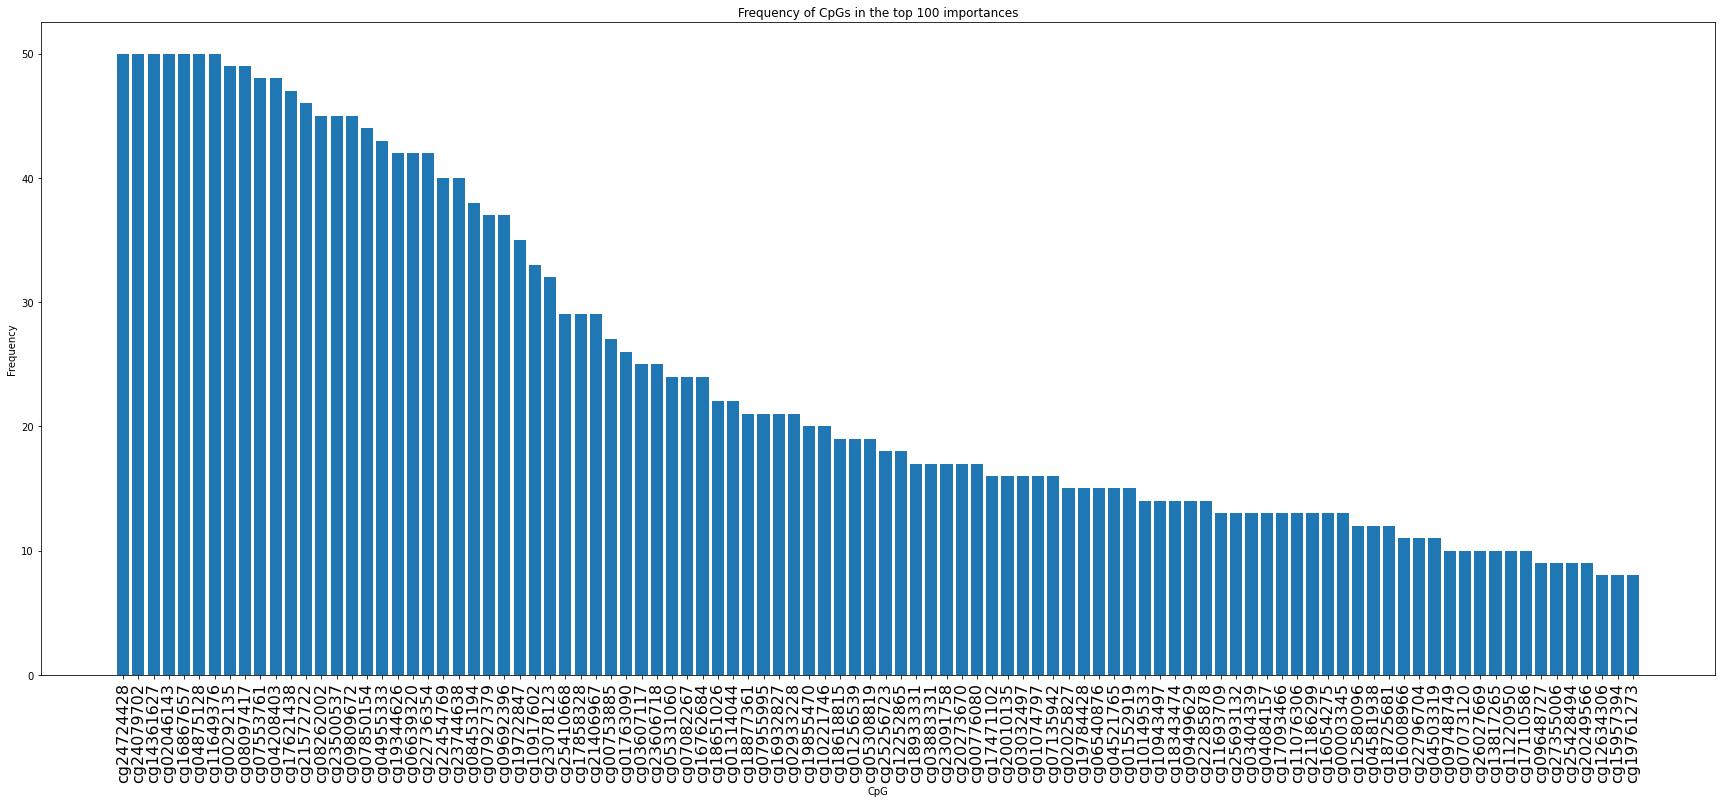

In [25]:
# This function makes a histogram of the frequency of cgs in the top 100 in the 50 trials above
inds2, vs2, h2 = rg.histogram_of_top_CpGs_by_importance(df_shap_vals, 100)

In [78]:
cpgs_XGboost_blood_ranked = pu.get_pickled_object('../saved_features/cpgs_XGboost_blood_ranked')

In [80]:
cpgs_XGboost_Shapley_blood_ranked = h2.index
pu.pickle_object(cpgs_XGboost_Shapley_blood_ranked, 'cpgs_XGboost_Shapley_blood_ranked')

pickled as cpgs_XGboost_Shapley_blood_ranked


#### How many of top 100 in common

In [31]:
count = 0
common=[]
for i, cpg in enumerate(h2.index[:100]):
    if cpg in cpgs_XGboost_blood_ranked[:100]:
        print(i, cpg)
        common.append(cpg)
        count+=1
    else:
        print(i, 'nope')
print(count)

0 cg24724428
1 cg24079702
2 cg14361627
3 cg02046143
4 cg16867657
5 cg04875128
6 cg11649376
7 cg00292135
8 cg08097417
9 cg07553761
10 cg04208403
11 cg17621438
12 cg21572722
13 cg08262002
14 cg23500537
15 cg09809672
16 cg07850154
17 cg04955333
18 cg19344626
19 cg06639320
20 cg22736354
21 cg22454769
22 cg23744638
23 cg08453194
24 cg07927379
25 cg09692396
26 cg19722847
27 cg10917602
28 cg23078123
29 cg25410668
30 nope
31 cg21406967
32 cg00753885
33 cg01763090
34 cg03607117
35 cg23606718
36 cg05331060
37 cg07082267
38 cg16762684
39 cg18651026
40 cg01314044
41 cg18877361
42 cg07955995
43 cg16932827
44 cg02933228
45 cg19855470
46 cg10221746
47 cg18618815
48 cg01256539
49 cg05308819
50 cg25256723
51 cg12252865
52 cg18933331
53 cg03883331
54 cg23091758
55 cg20273670
56 cg00776080
57 cg17471102
58 cg20010135
59 cg03032497
60 cg01074797
61 cg07135942
62 cg02025827
63 cg19784428
64 cg06540876
65 cg04521765
66 nope
67 cg10149533
68 cg10943497
69 cg18343474
70 cg09499629
71 cg22285878
72 cg11693709


In [82]:
count = 0
common=[]
for i, cpg in enumerate(h2.index[:1000]):
    if cpg in cpgs_XGboost_blood_ranked[:1000]:
        #print(i, cpg)
        common.append(cpg)
        count+=1
    else:
        pass#print(i, 'nope')
print(count)

325


In [84]:
count = 0
common=[]
for i, cpg in enumerate(cpgs_XGboost_blood_ranked[:10]):
    if cpg in h2.index[:10]:
        #print(i, cpg)
        common.append(cpg)
        count+=1
    else:
        pass#print(i, 'nope')
print(count)

8


### Running XGboost 50 times to identify top 100 cpgs

In [44]:
# %%time
# df_imp, mse_train, mse_test, rmse_train, rms_test, r2_train, r2_test, models =repeat_XGBoost_II(df_p_working, 1, test_size=0.20)

In [45]:
%%time
# # Runnin XGboost on working dataset 50 times with 50 different train/test splits
# # This can take many hours (on whole blood 10 hrs)
# df_imp, rms_train, rms_test, r2_train, r2_test = repeat_XGBoost(df_p_working, 50, test_size=0.20)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.05 µs


In [46]:
# df_imp

In [48]:
# write 50 trials results to a file, so don't have to rerun the 50 XGboost trials with the whole dataset again
# file = 'df_importance_EWAS_age_' + tissue_of_interest + '_50_trials.csv'
#df_imp.to_csv(file)
df_imp = pd.read_csv('df_importance_EWAS_age_whole blood_50_trials.csv' , index_col=0)

In [50]:
# Finding cpgs with on average the highest importance scores, see mean columnn in df below
df_imp_sorted = rg.importances_sorted_by_mean(df_imp)

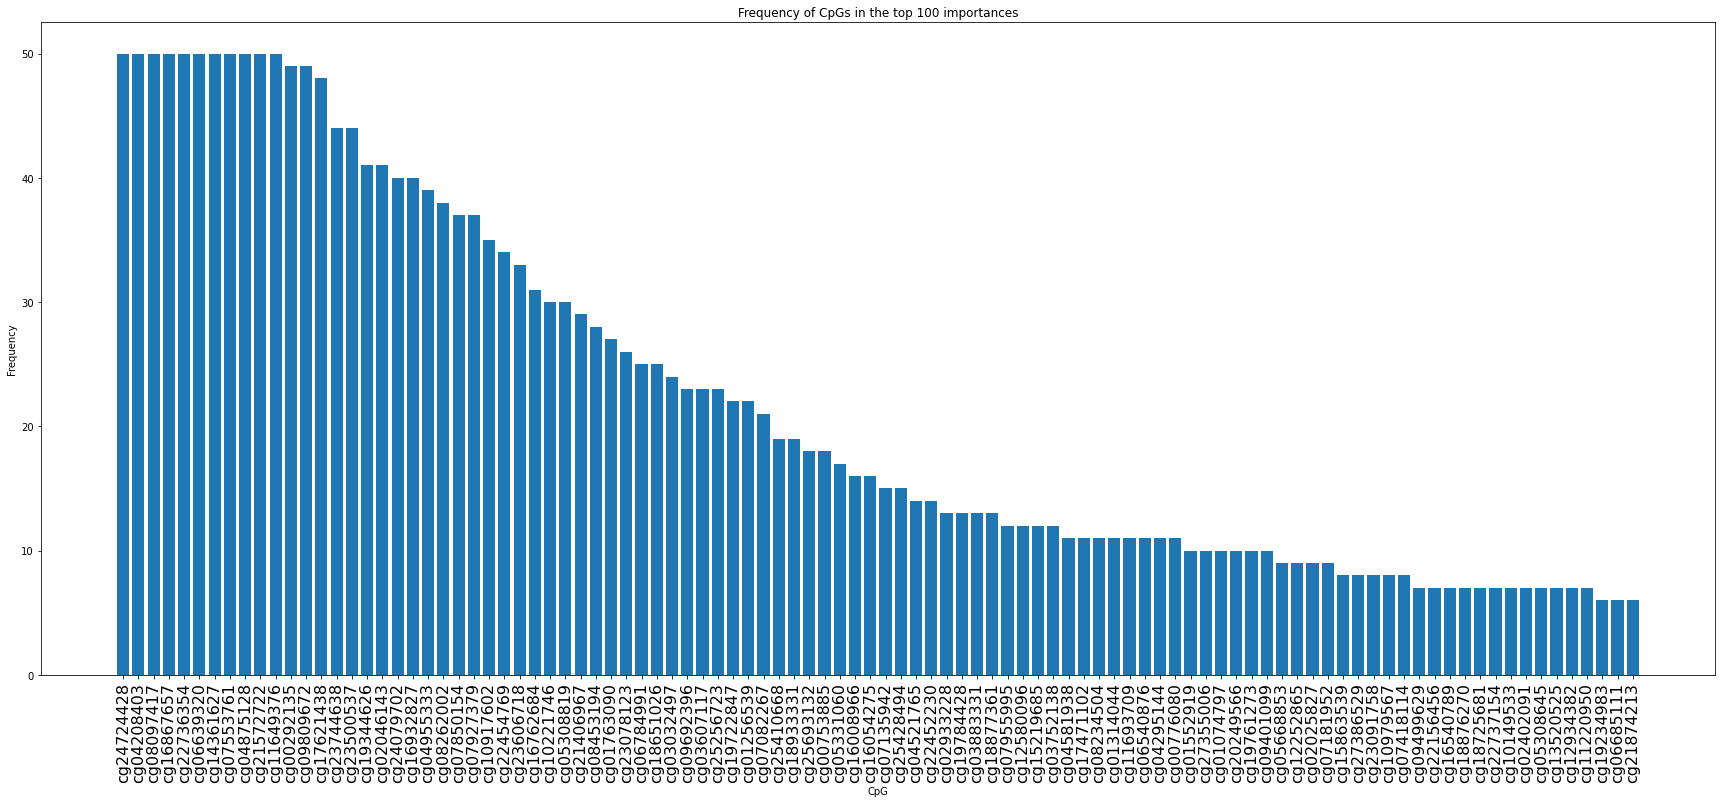

In [52]:
# This function makes a histogram of the frequency of cgs in the top 100 in the 50 trials above
inds, vs, h = rg.histogram_of_top_CpGs_by_importance(df_imp, 100)

In [69]:
topF = h[:100]
topS = h2[:100]

In [70]:
tops_FS = topF[topS.index]

In [71]:
tops_SF = topS[topF.index]

In [72]:
df_both_SF = pd.DataFrame([tops_SF, topF])
df_both_FS = pd.DataFrame([tops_FS, topS])

In [73]:
df_both_SF_t = df_both_SF.T
df_both_SF_t.columns = ['SF', 'F']
df_both_FS_t = df_both_FS.T
df_both_FS_t.columns = ['FS', 'S']

In [76]:
df_both_FS_t

,FS,S
cg24724428,50.0,50.0
cg24079702,40.0,50.0
cg14361627,50.0,50.0
cg02046143,41.0,50.0
cg16867657,50.0,50.0
...,...,...
cg25428494,15.0,9.0
cg20249566,10.0,9.0
cg12634306,NaN,8.0
cg15957394,NaN,8.0


In [75]:
df_both_SF_t

,SF,F
cg24724428,50.0,50.0
cg04208403,48.0,50.0
cg08097417,49.0,50.0
cg16867657,50.0,50.0
cg22736354,42.0,50.0
...,...,...
cg12934382,NaN,7.0
cg11220950,10.0,7.0
cg19234983,NaN,6.0
cg06685111,NaN,6.0


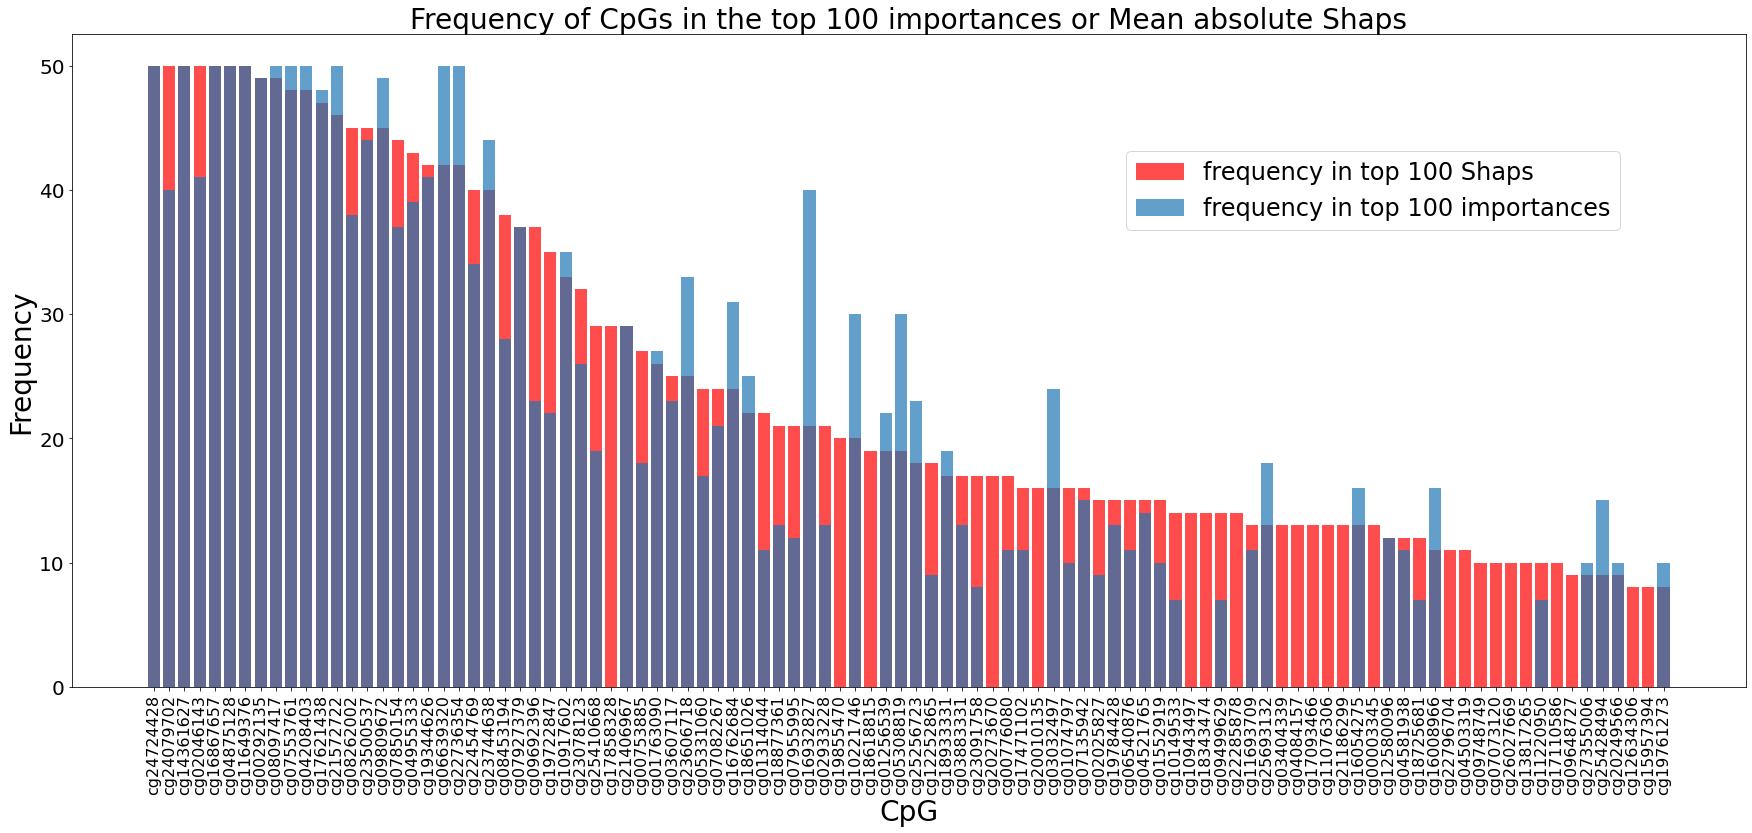

In [74]:
f_size=28

fig, ax = plt.subplots(1, 1, figsize = (30, 12))
ax.bar(df_both_FS_t.index, df_both_FS_t.S,color='r',alpha=0.7, label= 'frequency in top 100 Shaps')
ax.bar(df_both_FS_t.index, df_both_FS_t.FS, alpha=0.7,  label= 'frequency in top 100 importances')
ax.set_title('Frequency of CpGs in the top 100 importances or Mean absolute Shaps', fontsize=f_size)
ax.set_ylabel('Frequency', fontsize=f_size)
ax.set_xlabel('CpG', fontsize=f_size)
ax.tick_params(labelsize = 16, rotation=90)
ax.tick_params('y',labelsize = 20, rotation=0)
ax.legend(loc=(0.63,0.7), fontsize=24)
plt.show()



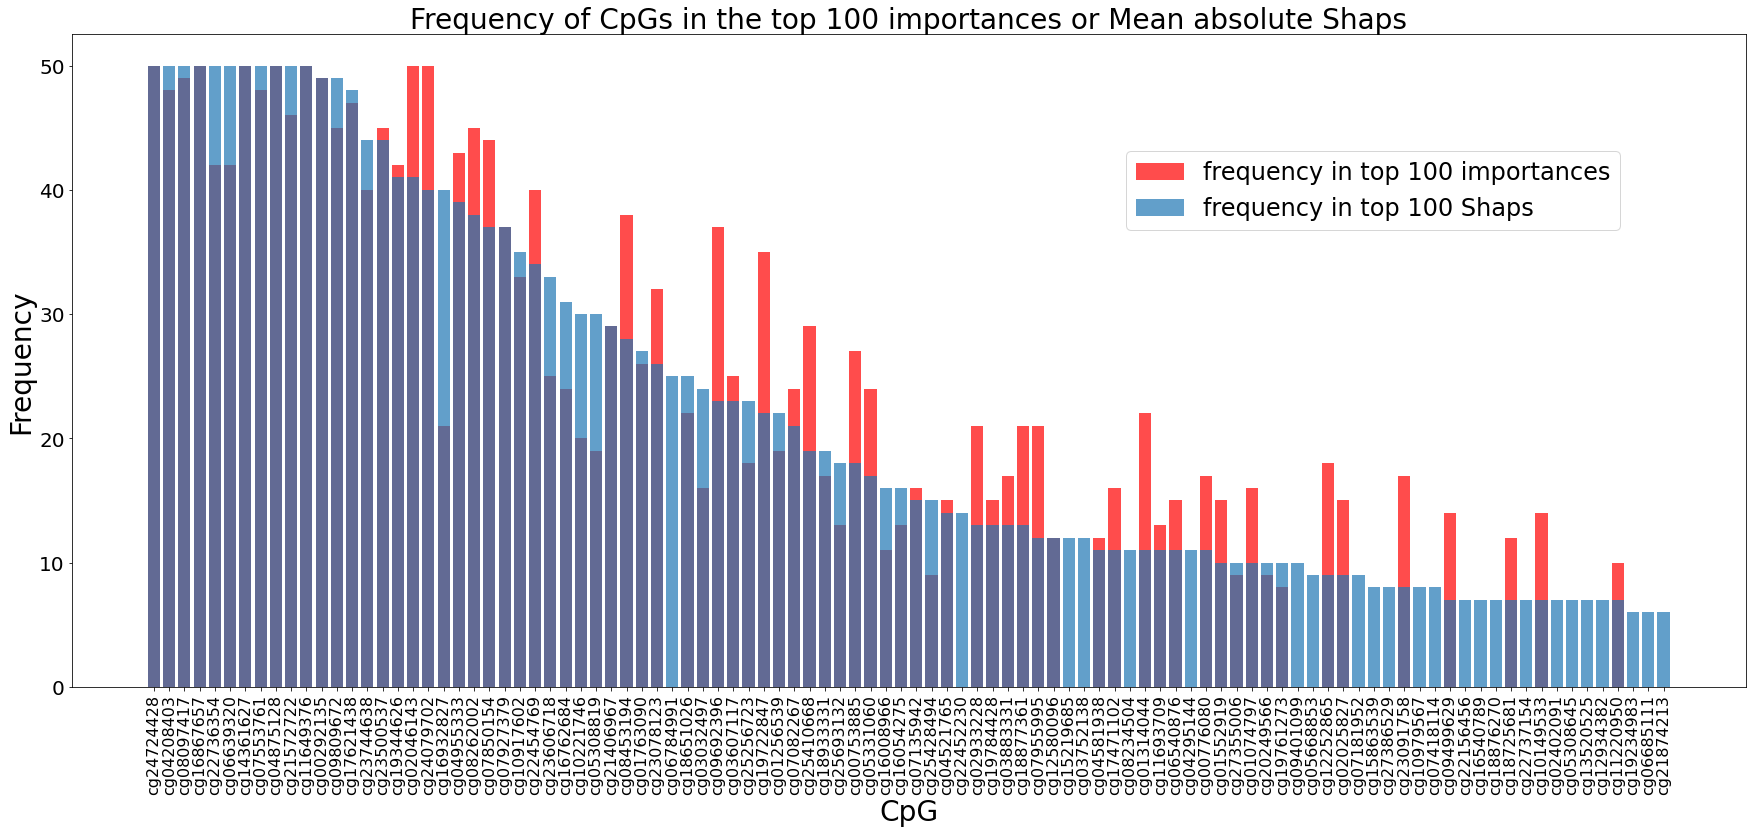

In [77]:
# plotting Importance Frequency histogram with mean abs shap superimposed

f_size=28

fig, ax = plt.subplots(1, 1, figsize = (30, 12))
ax.bar(df_both_SF_t.index, df_both_SF_t.SF,  alpha= 0.7, color='r', label= 'frequency in top 100 importances')
ax.bar(df_both_SF_t.index, df_both_SF_t.F, alpha=0.7, label= 'frequency in top 100 Shaps')
ax.set_title('Frequency of CpGs in the top 100 importances or Mean absolute Shaps', fontsize=f_size)
ax.set_ylabel('Frequency', fontsize=f_size)
ax.set_xlabel('CpG', fontsize=f_size)
ax.tick_params(labelsize = 16, rotation=90)
ax.tick_params('y',labelsize = 20, rotation=0)
ax.legend(loc=(0.63,0.7), fontsize=24)
plt.show()

